   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

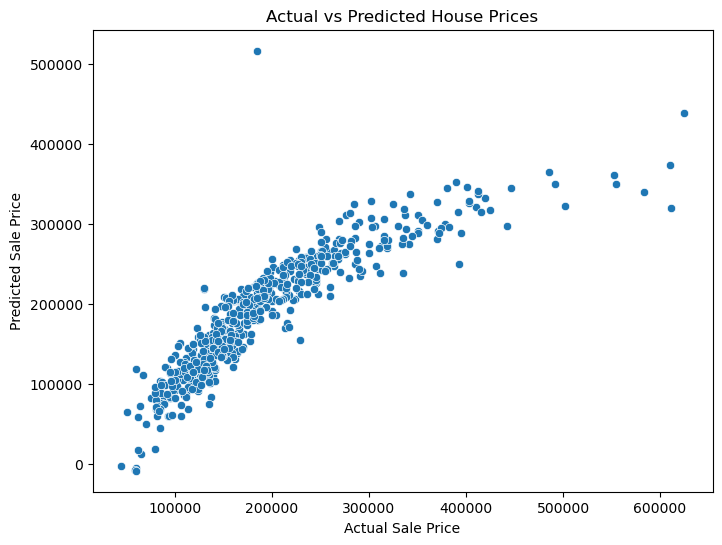

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("AmesHousing.csv")
print(df.head())
# Step 2: Select relevant features
selected_features = ["Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Gr Liv Area", "Full Bath", "TotRms AbvGrd", "Garage Cars"]
X = df[selected_features]  # Features
y = df["SalePrice"]  # Target

# Step 3: Handle missing values (fill with median values)
X = X.fillna(X.median())

# Step 4: Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Step 8: Visualize actual vs. predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


Missing values before filling:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Missing values after filling:
Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool 

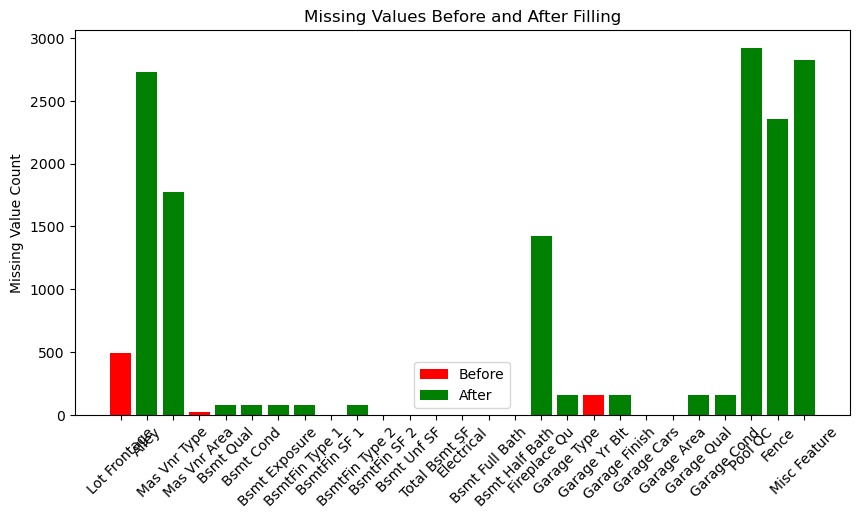

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AmesHousing.csv')

# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values before filling:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Step 2: Fill missing values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 3: Verify missing values are filled
missing_values_after = df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after[missing_values_after > 0])  # Should be empty

# Step 4: Visualize before and after filling missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values[missing_values > 0].index, missing_values[missing_values > 0].values, color='red', label='Before')
plt.bar(missing_values_after[missing_values_after > 0].index, missing_values_after[missing_values_after > 0].values, color='green', label='After')
plt.xticks(rotation=45)
plt.ylabel("Missing Value Count")
plt.title("Missing Values Before and After Filling")
plt.legend()
plt.show()
